In [1]:
# move to project directory from notebooks subdirectory
%cd ..
%pwd

/tf/fiit_nn_project


'/tf/fiit_nn_project'

In [2]:
from src.data import load_data
from src.data import processing
import src.utils as utils
import matplotlib as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (15, 12)

In [4]:
# load data
val_x, val_y = load_data.load_dataset('data/compressed_data/compressed_images.npz')

# Example of labeled objects in image

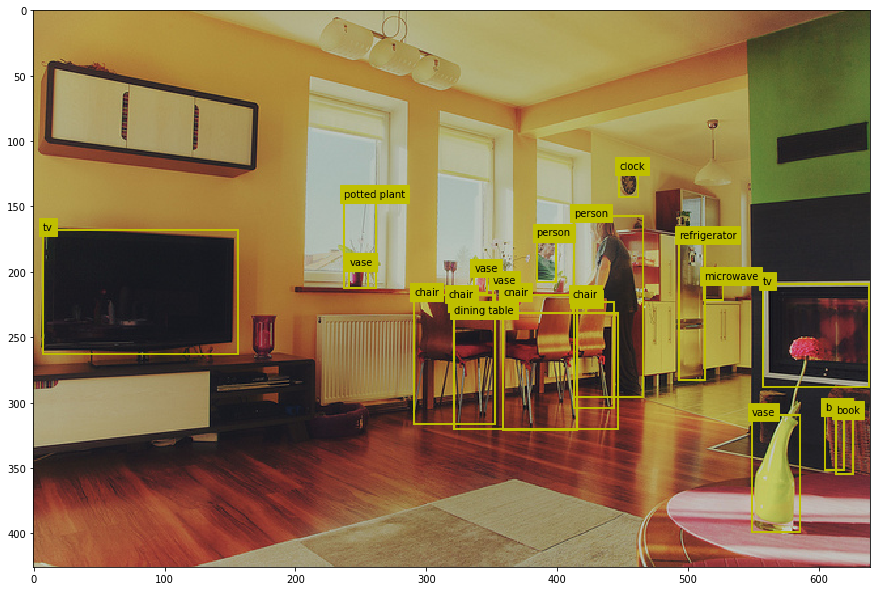

In [5]:
utils.plot_img_with_bboxes(val_x[0], val_y[0])

# Shape analysis

In this section we will focus on analysis of shapes of images in COCO dataset.

## Unique shapes

In [6]:
unique_shapes = np.unique(list(map(lambda x: x.shape, val_x)), axis=0, return_counts=True)

In [10]:
landscapes = 0
portraits = 0
for i in range(0, len(unique_shapes[0])):
    print(f'Shape: {unique_shapes[0][i]}, counts: {unique_shapes[1][i]}')
    if unique_shapes[0][i][0] > unique_shapes[0][i][1]:
        portraits += 1
    else:
        landscapes += 1

print(f'Num of landscapes: {landscapes}')
print(f'Num of portraits: {portraits}')

Shape: [240 320   3], counts: 2
Shape: [302 500   3], counts: 1
Shape: [315 640   3], counts: 1
Shape: [333 500   3], counts: 1
Shape: [349 640   3], counts: 1
Shape: [351 640   3], counts: 1
Shape: [359 640   3], counts: 1
Shape: [361 640   3], counts: 3
Shape: [363 640   3], counts: 1
Shape: [366 640   3], counts: 1
Shape: [375 500   3], counts: 5
Shape: [384 640   3], counts: 1
Shape: [396 500   3], counts: 1
Shape: [400 600   3], counts: 2
Shape: [419 640   3], counts: 1
Shape: [425 640   3], counts: 6
Shape: [426 640   3], counts: 4
Shape: [427 640   3], counts: 14
Shape: [428 640   3], counts: 1
Shape: [459 640   3], counts: 1
Shape: [480 640   3], counts: 17
Shape: [482 640   3], counts: 1
Shape: [483 640   3], counts: 1
Shape: [500 333   3], counts: 1
Shape: [500 375   3], counts: 4
Shape: [512 640   3], counts: 1
Shape: [531 640   3], counts: 1
Shape: [539 640   3], counts: 1
Shape: [555 640   3], counts: 1
Shape: [612 612   3], counts: 4
Shape: [640 424   3], counts: 1
Shape:

## Number of classes

### Number of classes in training dataset

In [6]:
from pycocotools.coco import COCO

coc = COCO(annotation_file='data/annotations_trainval2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=15.41s)
creating index...
index created!


In [7]:
ann_ids = coc.getAnnIds()

In [8]:
anns = coc.loadAnns(ids=ann_ids)

In [45]:
anns

[{'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156},
 {'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22,
    348.92,
    239.04,
    353.73,
    248.67,
    355.66,
    252.53,
    353.73]],
  'area': 1545.4213000000007,
  'iscrowd': 0,
  'image_id

In [44]:
for ann in anns:
    print(ann['category_id'])

58
58
58
58
58
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
6

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
6
6
6
6
6
6
6
6
6
6
6
6
6
7
9
9
9
9
9
9
9
9
9
9
9
9
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


50
50
50
50
50
50
50
50
51
50
51
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
5

81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
8

47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47

KeyboardInterrupt: 

In [23]:
unique_classes = {}
for ann in anns:
    if ann['category_id'] not in unique_classes:
        unique_classes[ann['category_id']] = 1
    else:
        unique_classes[ann['category_id']] += 1
            
for key, value in unique_classes.items():
    cat = coc.loadCats(ids=[key])[0]
    print(f'{cat["name"]}: {value}')

print(len(unique_classes))

hot dog: 2918
dog: 5508
potted plant: 8652
tv: 5805
bird: 10806
cat: 4768
horse: 6587
sheep: 9509
cow: 8147
bottle: 24342
couch: 5779
chair: 38491
dining table: 15714
bicycle: 7113
car: 43867
motorcycle: 8725
airplane: 5135
bus: 6069
train: 4571
boat: 10759
person: 262465
stop sign: 1983
umbrella: 11431
tie: 6496
sports ball: 6347
sandwich: 4373
bed: 4192
cell phone: 6434
refrigerator: 2637
clock: 6334
toothbrush: 1954
truck: 9973
traffic light: 12884
fire hydrant: 1865
parking meter: 1285
bench: 9838
elephant: 5513
giraffe: 5131
frisbee: 2682
skis: 6646
snowboard: 2685
kite: 9076
baseball bat: 3276
baseball glove: 3747
skateboard: 5543
surfboard: 6126
tennis racket: 4812
wine glass: 7913
cup: 20650
fork: 5479
knife: 7770
spoon: 6165
bowl: 14358
banana: 9458
apple: 5851
orange: 6399
broccoli: 7308
carrot: 7852
pizza: 5821
donut: 7179
cake: 6353
toilet: 4157
laptop: 4970
mouse: 2262
remote: 5703
keyboard: 2855
microwave: 1673
oven: 3334
toaster: 225
sink: 5610
book: 24715
vase: 6613
sci

In [12]:
unique_classes = {}
for image_annotations in val_y:
    for annotation in image_annotations:
        if annotation[1] not in unique_classes:
            unique_classes[annotation[1]] = 1
        else:
            unique_classes[annotation[1]] += 1
            
            
print(f'Number of classes: {len(unique_classes)}')
print()
for key, value in unique_classes.items():
    print(f'{key}: {value}')

Number of classes: 72

potted plant: 3
tv: 10
chair: 17
person: 287
microwave: 2
refrigerator: 3
book: 16
clock: 6
vase: 7
dining table: 12
bear: 1
bed: 5
stop sign: 2
truck: 8
car: 21
teddy bear: 3
skis: 5
oven: 2
sports ball: 1
baseball glove: 2
tennis racket: 3
handbag: 5
backpack: 9
bird: 4
boat: 7
cell phone: 5
train: 2
sandwich: 1
bowl: 15
surfboard: 7
laptop: 7
mouse: 4
keyboard: 9
bus: 6
cat: 2
airplane: 4
zebra: 2
tie: 19
traffic light: 7
apple: 2
baseball bat: 2
knife: 10
cake: 1
wine glass: 24
cup: 24
spoon: 7
banana: 8
donut: 1
bottle: 17
sink: 6
toilet: 3
broccoli: 15
skateboard: 2
fork: 4
carrot: 6
couch: 2
remote: 3
scissors: 2
bicycle: 5
sheep: 6
bench: 2
orange: 1
elephant: 6
frisbee: 3
umbrella: 2
horse: 2
dog: 1
motorcycle: 3
kite: 3
pizza: 6
fire hydrant: 2
suitcase: 2


## Average number of objects per image

In [7]:
anns = 0
for image_annotations in val_y:
    anns += len(image_annotations)
print(f'Average number of annotations per image: {anns / len(val_y)}')
print(f'Num of annotations: {anns}')

Average number of annotations per image: 7.14
Num of annotations: 714


## Number of portrait and landscape images per object category

In [13]:
# unique_classes = {'category': {'landscape': num, 'portrait': num}}
unique_classes = {}
for i in range(0, len(val_x)):
    
    image_annotations = {}  # serves as check if image for given category has already been counted
    for annotation in val_y[i]:
        if annotation[1] not in image_annotations:
            image_annotations[annotation[1]] = True
            if annotation[1] not in unique_classes:
                landscape = 1 if val_x[i].shape[0] <= val_x[i].shape[1] else 0
                portrait = 1 if val_x[i].shape[0] > val_x[i].shape[1] else 0
                
                unique_classes[annotation[1]] = {
                    'landscape': landscape, 
                    'portrait': portrait,
                    'image_indexes': [i]
                }
            else:
                if val_x[i].shape[0] > val_x[i].shape[1]:
                    unique_classes[annotation[1]]['portrait'] += 1
                else:
                    unique_classes[annotation[1]]['landscape'] += 1
                unique_classes[annotation[1]]['image_indexes'].append(i)
            
for key, value in unique_classes.items():
    print(f'{key}: {value}')
    print()

potted plant: {'landscape': 2, 'portrait': 0, 'image_indexes': [0, 2]}

tv: {'landscape': 5, 'portrait': 2, 'image_indexes': [0, 15, 44, 46, 64, 95, 98]}

chair: {'landscape': 8, 'portrait': 0, 'image_indexes': [0, 2, 21, 42, 44, 79, 84, 96]}

person: {'landscape': 42, 'portrait': 16, 'image_indexes': [0, 5, 7, 8, 9, 10, 11, 12, 14, 17, 19, 22, 24, 26, 27, 28, 29, 30, 33, 35, 36, 38, 41, 42, 43, 45, 47, 48, 49, 50, 53, 54, 58, 60, 61, 64, 65, 67, 68, 69, 71, 72, 74, 78, 81, 83, 84, 86, 88, 90, 92, 93, 94, 95, 96, 97, 98, 99]}

microwave: {'landscape': 2, 'portrait': 0, 'image_indexes': [0, 75]}

refrigerator: {'landscape': 2, 'portrait': 1, 'image_indexes': [0, 6, 75]}

book: {'landscape': 2, 'portrait': 0, 'image_indexes': [0, 2]}

clock: {'landscape': 3, 'portrait': 2, 'image_indexes': [0, 11, 77, 80, 96]}

vase: {'landscape': 3, 'portrait': 0, 'image_indexes': [0, 75, 79]}

dining table: {'landscape': 8, 'portrait': 2, 'image_indexes': [0, 21, 25, 28, 32, 40, 42, 64, 79, 96]}

bear:

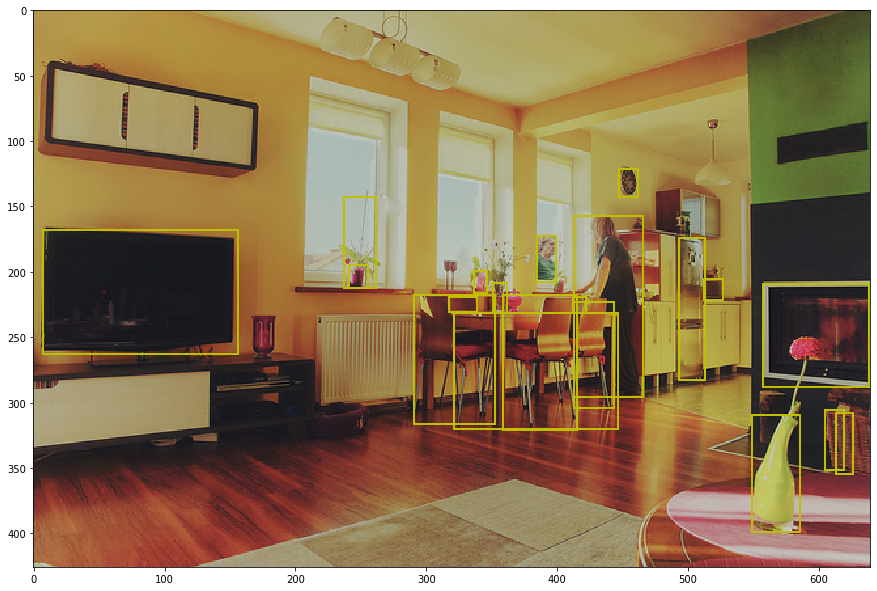

In [13]:
utils.plot_img_with_bboxes(val_x[0], val_y[0])

## Category picker

In [38]:
# load data
aux_val_x, aux_val_y = load_data.load_dataset('data/compressed_data/compressed_images.npz')

In [39]:
len(aux_val_y)

100

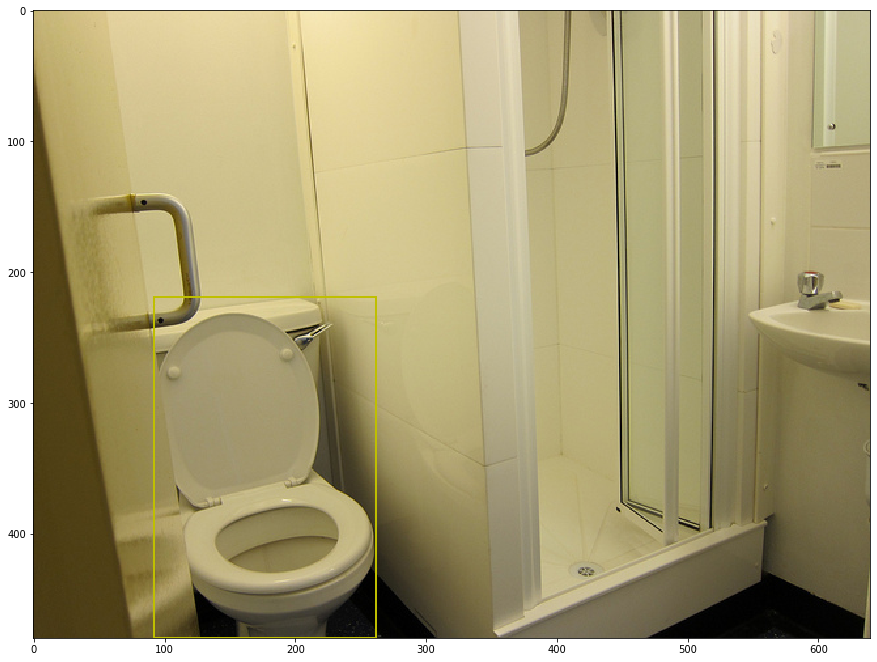

In [40]:
image_id = 99
utils.plot_img_with_bboxes(aux_val_x[image_id], aux_val_y[image_id])